<title> Investigations on Condition Number </title>

<title> Code to Test Effect Of Conditional Number </title>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
SEED = 45
N_ROWS = 30 # only square matrices have cond number


Let's create a random matrix A and evaulate its condition number

In [38]:
np.random.seed(SEED)
A = np.random.rand(N_ROWS,N_ROWS)
cond_a = np.linalg.cond(A)
print(f'Condition Number (k): {cond_a}')

Condition Number (k): 192.5388248134272


This is a good condition number, k >>1 but k << inf.
We know that k = 1 for orthogonal columns and k = inf for dependent columns (these identities don't change with scaling).
Here we are interested in the non-asymptotic cases.

Now we scale an arbitrary row of A with a sequence of scaling factors and see how the condition number of A changes.

In [39]:
scaling_constants = [_/10 for _ in range(1001)]  # [0,0, 0.1 ... 99.9, 100]
column_to_scale = 0  # can be changed or generalized to multiple rows
condition_numbers = []
for scaling_const in scaling_constants:
    # create scaling operator
    scale_op = np.identity(N_ROWS)
    scale_op[column_to_scale, column_to_scale] = scaling_const
    
    # scale A
    # reversing the order scales the row. This scales column.
    scaled_A = np.dot(A, scale_op)  
    condition_numbers.append(np.linalg.cond(scaled_A))


Let's plot the change of condition number with scaling constant

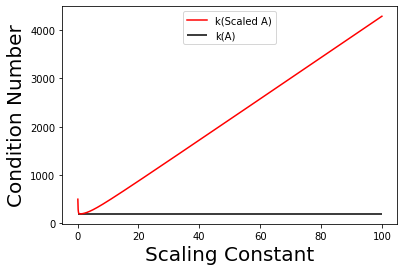

In [40]:
plt.plot(
    scaling_constants, 
    condition_numbers, 
    c='r', 
    label='k(Scaled A)')
plt.xlabel('Scaling Constant', fontsize=20)
plt.ylabel('Condition Number', fontsize=20)
plt.hlines(
    y=cond_a, 
    xmin=min(scaling_constants), 
    xmax=max(scaling_constants), 
    label='k(A)')
plt.legend(loc='upper center')